In [1]:
import os 
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

import sys
sys.path.extend(['..', '.'])
from nebula.plots import plotCrossValidationFolder, plotCrossValidationFieldvsKeys, plotVocabSizeMaxLenTests, plotCrossValidationDict, plotCrossValidationTrainingTime, plotVocabSizeMaxLenArchComparison, plotVocabSizeMaxLenHeatmap
from nebula.evaluation import readCrossValidationFolder, readCrossValidationMetricFile

PLOT_OUT_FOLDER = "./_crossValidationPlots"
os.makedirs(PLOT_OUT_FOLDER, exist_ok=True)

inFolders = [
    r"crossValidation\Cnn1DLinear_VocabSize_maxLen",
    r"crossValidation_NoOrdinal100\Cnn1DLinear_VocabSize_maxLen",
    r"crossValidation_WithAPIargs\Cnn1DLinear_VocabSize_maxLen"
]

# Compare the preprocessing methods

## Using lineplots with maxLen = 1024 and vocabSize = 2000

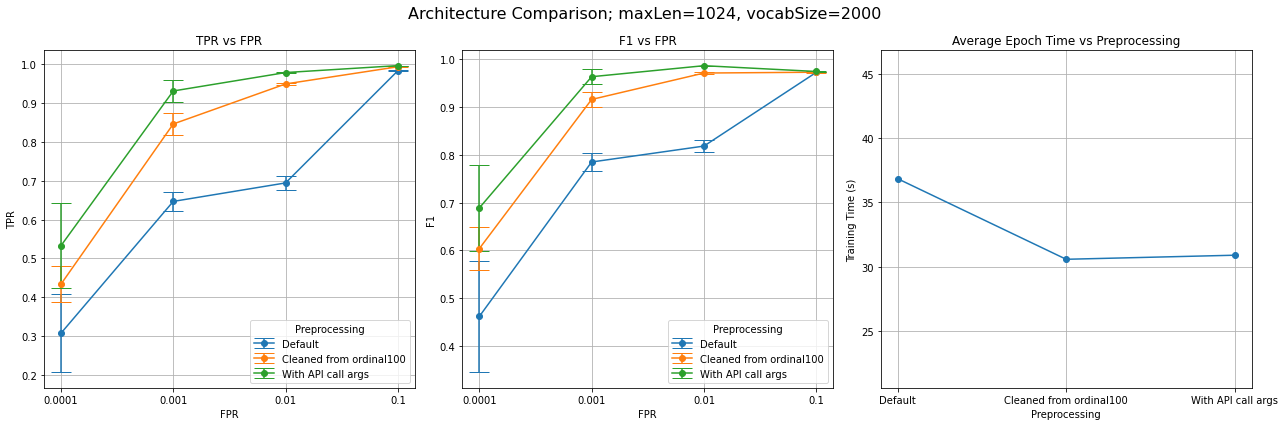

In [2]:
figSize = (18, 6)
title="Preprocessing"
labels = ["Default", "Cleaned from ordinal100", "With API call args"]

_, _, fig, ax = plotVocabSizeMaxLenArchComparison(inFolders, maxLen=1024, vocabSize=2000, savePath=None, legendTitle=title)

# modify legend for first plot
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, title=title)
# do the saame for ax[1]
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title=title)
# set basePaths as xticklabels for ax[2]
ax[2].set_xticks(ax[2].get_xticks())
_ = ax[2].set_xticklabels(labels)

plt.tight_layout()
savePath = f"{PLOT_OUT_FOLDER}/_PreProcessingComparison.png"
plt.savefig(savePath)

## Heatmaps for FPR = 0.01

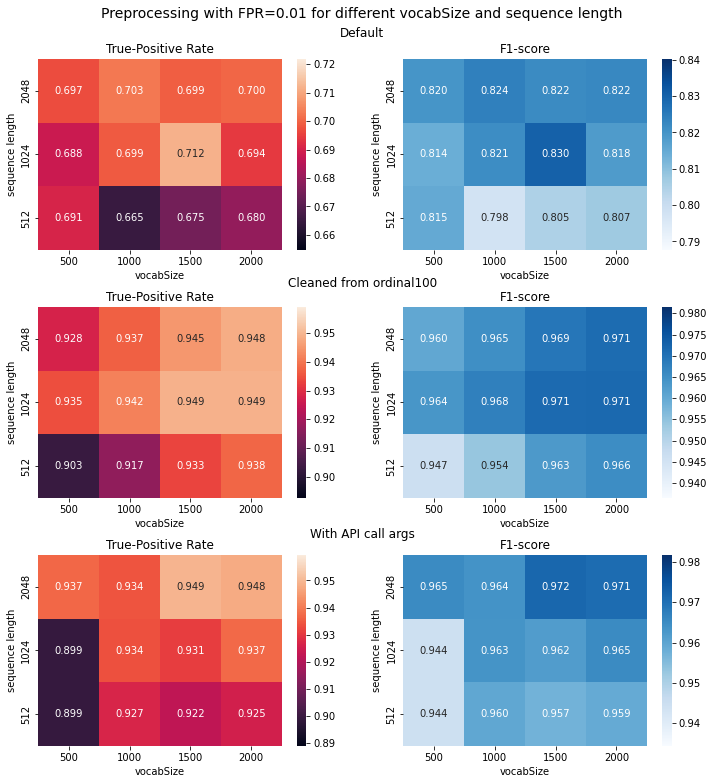

In [3]:
def plotHeatMapsInFolders(inFolders, fpr, vocabSizes, maxLengths, subplotTitles=None, savePath=None):

    # create 6 plots 3 rows, 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))

    for i, inFolder in enumerate(inFolders):
        plotVocabSizeMaxLenHeatmap(inFolder, fpr,
                                    savePath=None,
                                    rangeL=0.01,
                                    vocabSizes=vocabSizes, 
                                    maxLens=maxLengths,  
                                    axs=[axs[i,0], axs[i,1]]
                                )
    _ = plt.suptitle(f"Preprocessing with FPR={fpr} for different vocabSize and sequence length", fontsize=14)
    # increase gap between subplot rows
    plt.subplots_adjust(hspace=0.3)
    # reduce gap after suptitle
    plt.subplots_adjust(top=0.92)
    if subplotTitles:
        for height, subplotTitle in zip([0.95, 0.66, 0.37], subplotTitles):
            plt.figtext(0.5, height, subplotTitle, ha="center", va="center", fontsize=12)
    if savePath:
        plt.savefig(savePath)
    return fig, axs

vocabSizes = [500, 1000, 1500, 2000]
maxLengths = [512, 1024, 2048]
savePath=None
_ = plotHeatMapsInFolders(inFolders, "0.01", vocabSizes, maxLengths, savePath=savePath, subplotTitles=labels)

## Heatmaps for FPR = 0.001

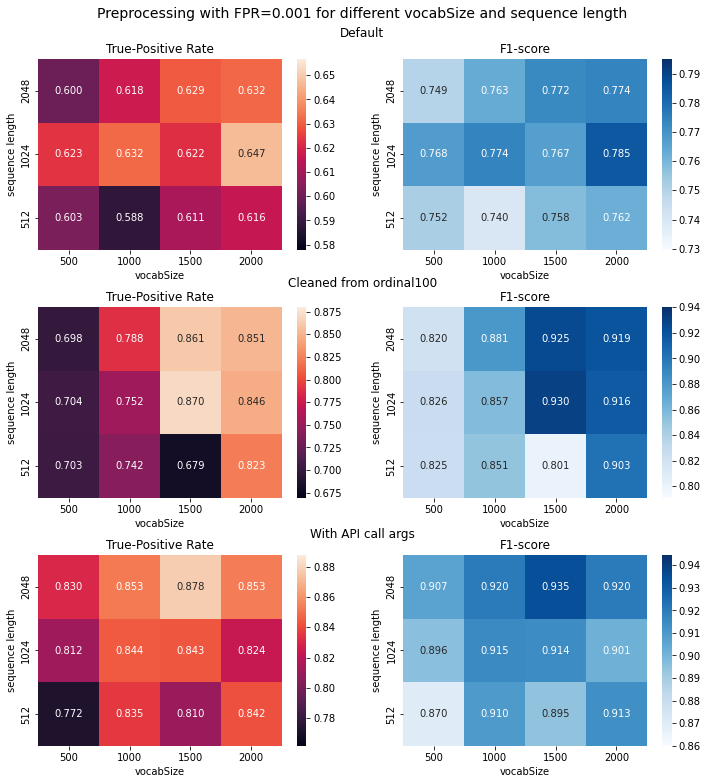

In [4]:
savePath=None
_ = plotHeatMapsInFolders(inFolders, "0.001", vocabSizes, maxLengths, savePath=savePath, subplotTitles=labels)

# API args full heatmap

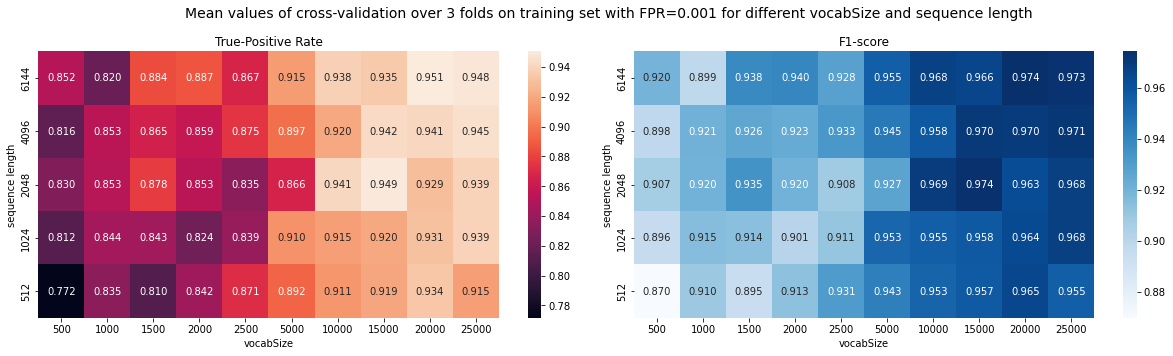

In [14]:
fpr = "0.001"
inFolder = r"crossValidation_WithAPIargs\Cnn1DLinear_VocabSize_maxLen"
savePath = f"{PLOT_OUT_FOLDER}/Cnn1DLinear_withAPIargs_fullHeatmap.png"
_ = plotVocabSizeMaxLenHeatmap(inFolder, fpr, savePath=savePath, rangeL=None, figSize=(17,5), 
                            supTitle="Mean values of cross-validation over 3 folds on training set") 

#### TL;DR: While increasing vocab size, sequence length and model's complexity further might yield higher metrics, `vocabSize=15000` and `maxLen=2048` express ability to be a good middle ground for further tests.